In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import umap

In [2]:
sns.set_theme(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
import ast

# load dataset
spotify_df = pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/filtered_track_features_for_children.csv")

spotify_df['track_ids'] = spotify_df['track_ids'].apply(lambda x: [int(i) for i in ast.literal_eval(x)])

spotify_df = spotify_df.drop(['index'], axis=1)

spotify_df

,track_ids,spotify_uri,danceability,energy,instrumentalness,acousticness,tempo,valence,key,liveness,loudness,mode,speechiness,time_signature
0,"[36346257, 36346035, 47511869]",4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.591000,129.062,0.7200,0,0.0992,-7.036,1,0.0370,4
1,[32496162],4G8gkOterJn0Ywt6uhqbhp,0.448,0.784,0.000108,0.099900,136.239,0.2370,9,0.6680,-3.686,1,0.0625,4
2,"[33619193, 33609599, 33596930, 33614869, 33614...",1c8gk2PeTE04A1pIDH9YMk,0.730,0.769,0.000000,0.138000,104.948,0.5070,8,0.0473,-5.114,1,0.0298,4
3,[32083560],7w87IxuO7BDcJ3YUqCyMTT,0.733,0.710,0.115000,0.145000,127.975,0.9650,5,0.0956,-5.849,0,0.0292,4
4,[45222862],6mFkJmJqdDVQ1REhVfGgd1,0.481,0.262,0.011400,0.735000,122.861,0.3750,7,0.8320,-15.730,1,0.0414,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932270,[25940230],7eJzvDw5aevgjYsBeQzLPN,0.815,0.535,0.000321,0.013900,150.040,0.9540,11,0.1070,-11.916,0,0.0621,4
932271,[25957395],1wU7thArfjO4SwsPwQOSPG,0.554,0.429,0.000425,0.171000,114.987,0.6270,0,0.2030,-12.449,1,0.3230,4
932272,[25957581],2VifxaGtEp2Gxu753Y8PQQ,0.760,0.685,0.000104,0.014700,193.993,0.7710,9,0.0918,-4.952,1,0.0894,4
932273,[25957755],5JEs2no74V9HkrhFRDcaF1,0.677,0.884,0.000146,0.712000,115.440,0.7500,10,0.8310,-6.385,1,0.0619,4


In [68]:
from sklearn.decomposition import PCA

#reducer = umap.UMAP(n_components=2)
reducer = PCA(n_components=2, svd_solver='full')


In [36]:
#one hot encode the key
one_hot_encoded = pd.get_dummies(spotify_df, columns=['key'], dtype='int')
#one_hot_encoded = spotify_df

one_hot_encoded

,track_ids,spotify_uri,danceability,energy,instrumentalness,acousticness,tempo,valence,liveness,loudness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,"[36346257, 36346035, 47511869]",4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.591000,129.062,0.7200,0.0992,-7.036,...,0,0,0,0,0,0,0,0,0,0
1,[32496162],4G8gkOterJn0Ywt6uhqbhp,0.448,0.784,0.000108,0.099900,136.239,0.2370,0.6680,-3.686,...,0,0,0,0,0,0,0,1,0,0
2,"[33619193, 33609599, 33596930, 33614869, 33614...",1c8gk2PeTE04A1pIDH9YMk,0.730,0.769,0.000000,0.138000,104.948,0.5070,0.0473,-5.114,...,0,0,0,0,0,0,1,0,0,0
3,[32083560],7w87IxuO7BDcJ3YUqCyMTT,0.733,0.710,0.115000,0.145000,127.975,0.9650,0.0956,-5.849,...,0,0,0,1,0,0,0,0,0,0
4,[45222862],6mFkJmJqdDVQ1REhVfGgd1,0.481,0.262,0.011400,0.735000,122.861,0.3750,0.8320,-15.730,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932270,[25940230],7eJzvDw5aevgjYsBeQzLPN,0.815,0.535,0.000321,0.013900,150.040,0.9540,0.1070,-11.916,...,0,0,0,0,0,0,0,0,0,1
932271,[25957395],1wU7thArfjO4SwsPwQOSPG,0.554,0.429,0.000425,0.171000,114.987,0.6270,0.2030,-12.449,...,0,0,0,0,0,0,0,0,0,0
932272,[25957581],2VifxaGtEp2Gxu753Y8PQQ,0.760,0.685,0.000104,0.014700,193.993,0.7710,0.0918,-4.952,...,0,0,0,0,0,0,0,1,0,0
932273,[25957755],5JEs2no74V9HkrhFRDcaF1,0.677,0.884,0.000146,0.712000,115.440,0.7500,0.8310,-6.385,...,0,0,0,0,0,0,0,0,1,0


In [69]:
# scale feature
music_data = spotify_df[["speechiness", "instrumentalness", "valence", "liveness", "energy", "tempo", "danceability", "acousticness"]].values
#print(music_data[:,5])
scaler = MinMaxScaler().fit(music_data)

#scaled_music_data = music_data
scaled_music_data = scaler.transform(music_data)

#display(scaled_music_data[:,0])

In [72]:
# load embedding
def get_embedding(type):
    if type == 0:
        return pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/pca_embedding.csv").to_numpy()
    if type == 1:
        return pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/umap_embedding.csv").to_numpy()
    if type == 2:
        embedding = reducer.fit_transform(scaled_music_data)
        pd.DataFrame(embedding).to_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/pca_embedding.csv", index=False)
        return embedding

In [88]:
embedding_pca = get_embedding(0)
embedding_umap = get_embedding(1)
#print(embedding)

[[ 0.02807146  0.56748977]
 [-0.24667373 -0.01968576]
 [-0.27962911  0.15625224]
 ...
 [-0.42243577  0.17079351]
 [-0.11842298  0.43832389]
 [-0.2773463  -0.11905627]]


Text(0.5, 1.0, 'Song features embedded in 2D space')

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

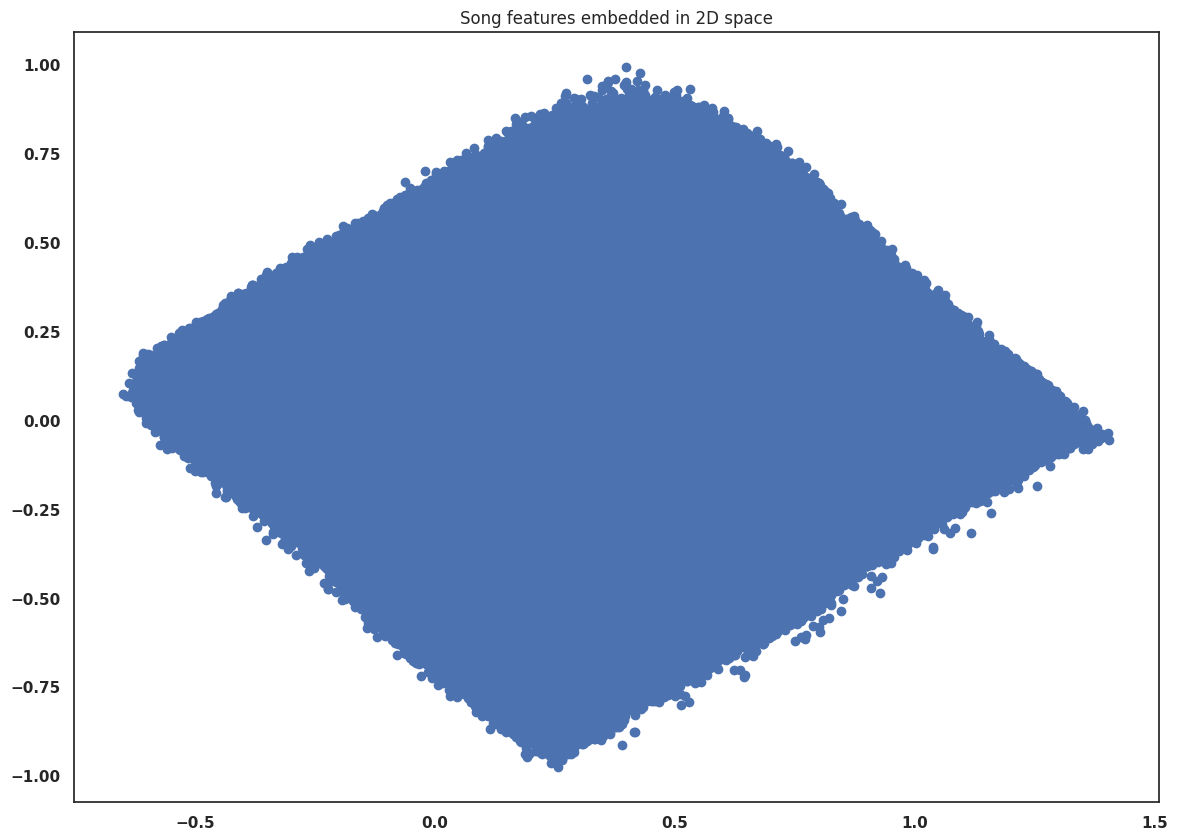

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')

fig, ax = plt.subplots(2)

fig[0].scatter(
    embedding[:, 0],
    embedding[:, 1]
    )

fig[1].scatter(
    embedding[:, 0],
    embedding[:, 1]
    )
plt.title("Song features embedded in 2D space")

Done first
For n_clusters = 2 The average silhouette_score is : 0.5076446344775348
Done first
For n_clusters = 3 The average silhouette_score is : 0.5525958199441237
Done first
For n_clusters = 4 The average silhouette_score is : 0.564300802686599
Done first
For n_clusters = 5 The average silhouette_score is : 0.47000588992981596
Done first
For n_clusters = 10 The average silhouette_score is : 0.37088840266894535


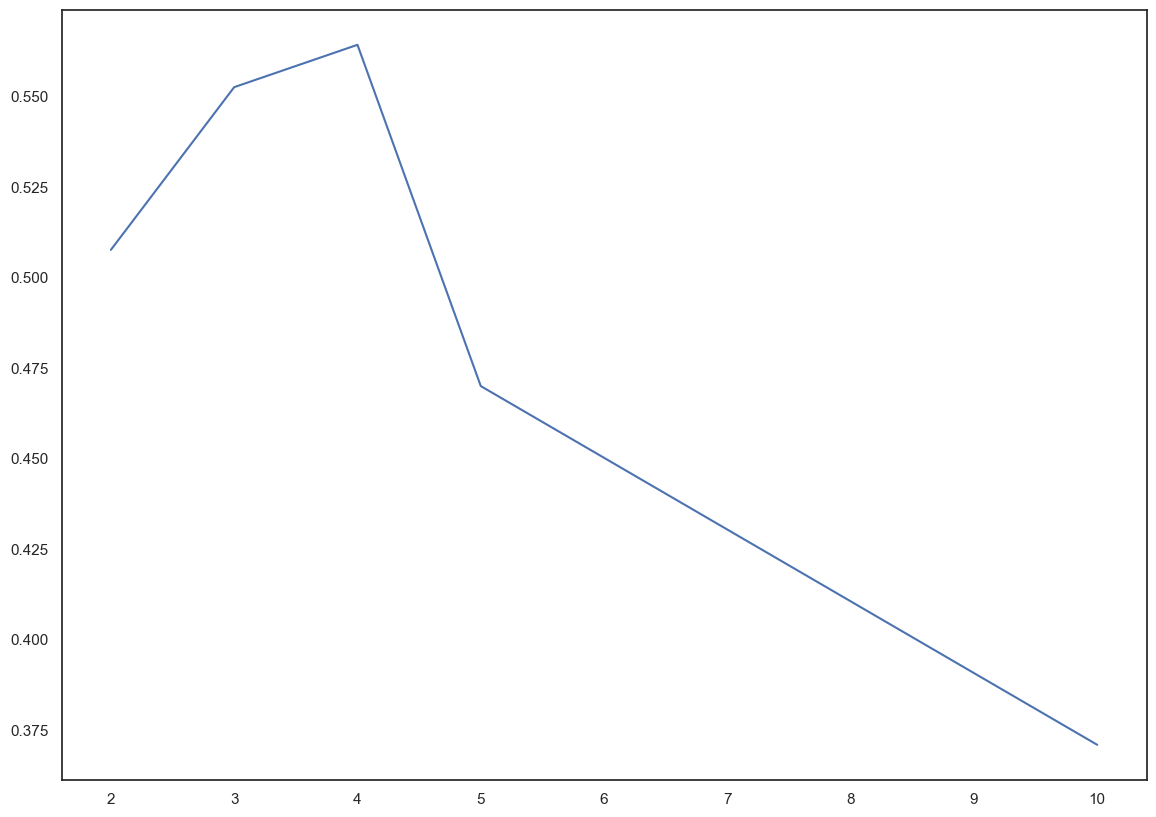

In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import colorcet as cc
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 10]

results_X = []
results_y = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(embedding)
    print("Done first")

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(embedding[:40000], cluster_labels[:40000])
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    #sample_silhouette_values = silhouette_samples(embedding[:100000], cluster_labels[:100000])

    results_X.append(n_clusters)
    results_y.append(silhouette_avg)

plt.plot(results_X, results_y)

plt.show()

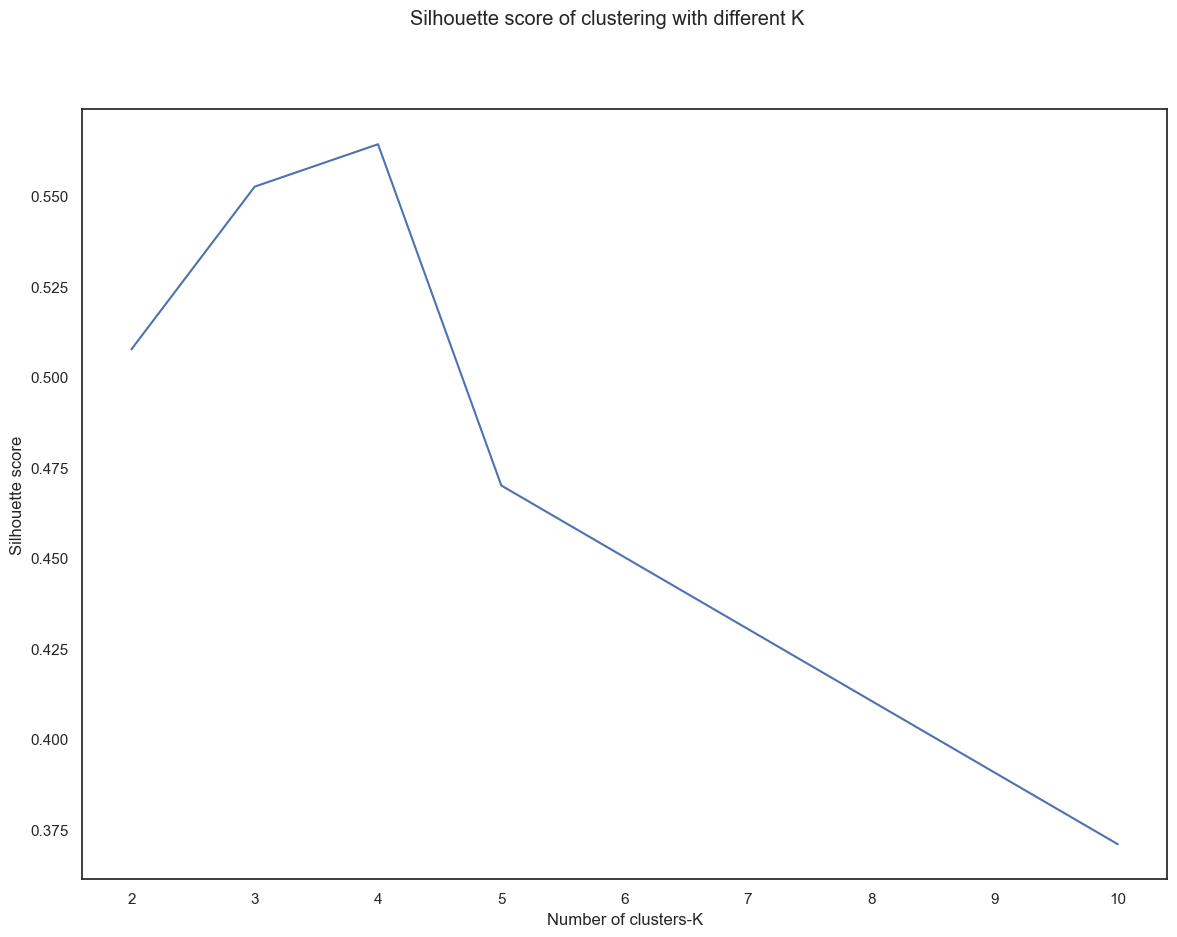

In [130]:
fig, ax = plt.subplots()

ax.plot(results_X, results_y)
fig.suptitle("Silhouette score of clustering with different K")
ax.set_xlabel("Number of clusters-K")
ax.set_ylabel("Silhouette score")
plt.show()

Done first
For n_clusters = 4 The average silhouette_score is : 0.5559199115864857


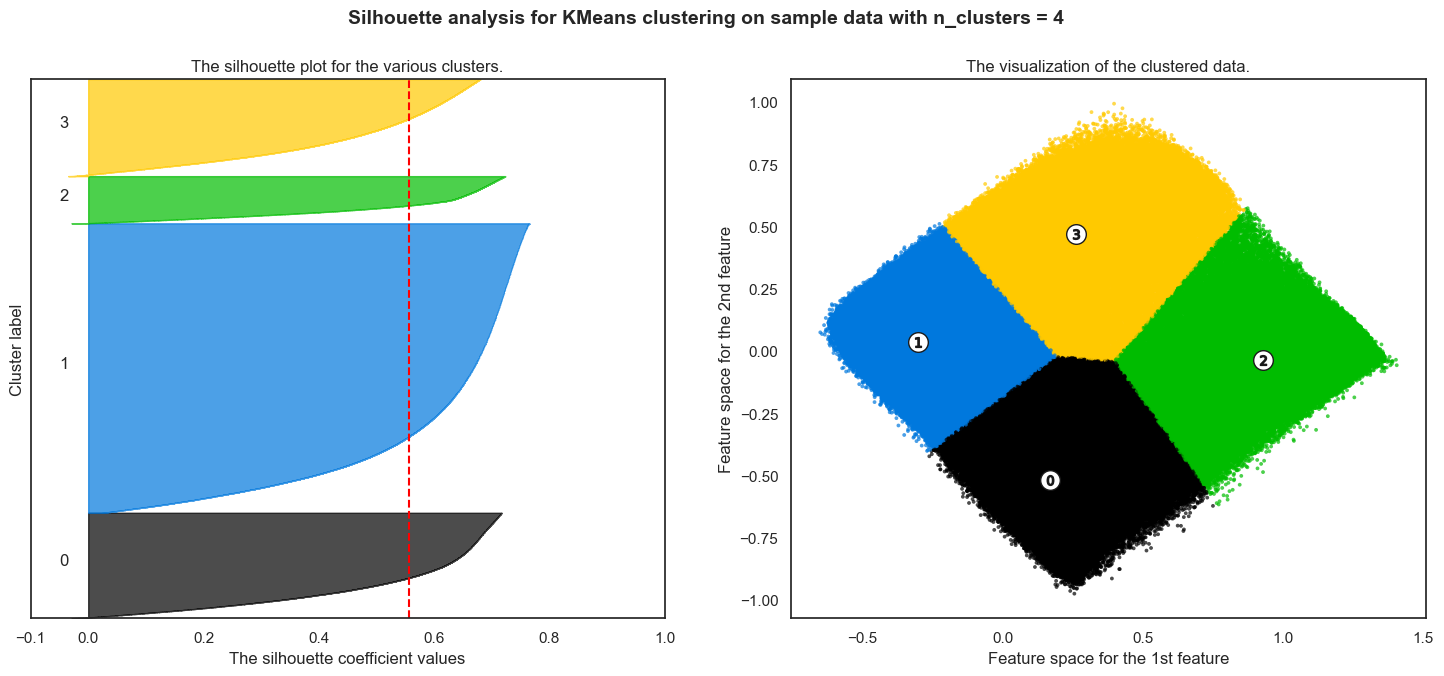

In [120]:
def visualize_silhoutte():
    n_clusters = 4

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(embedding) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(embedding)
    print("Done first")

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(embedding[:], cluster_labels[:])

    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(embedding, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        

        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        embedding[:, 0], embedding[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

visualize_silhoutte()


Text(0, 0.5, 'Feature space for the 2nd feature')

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

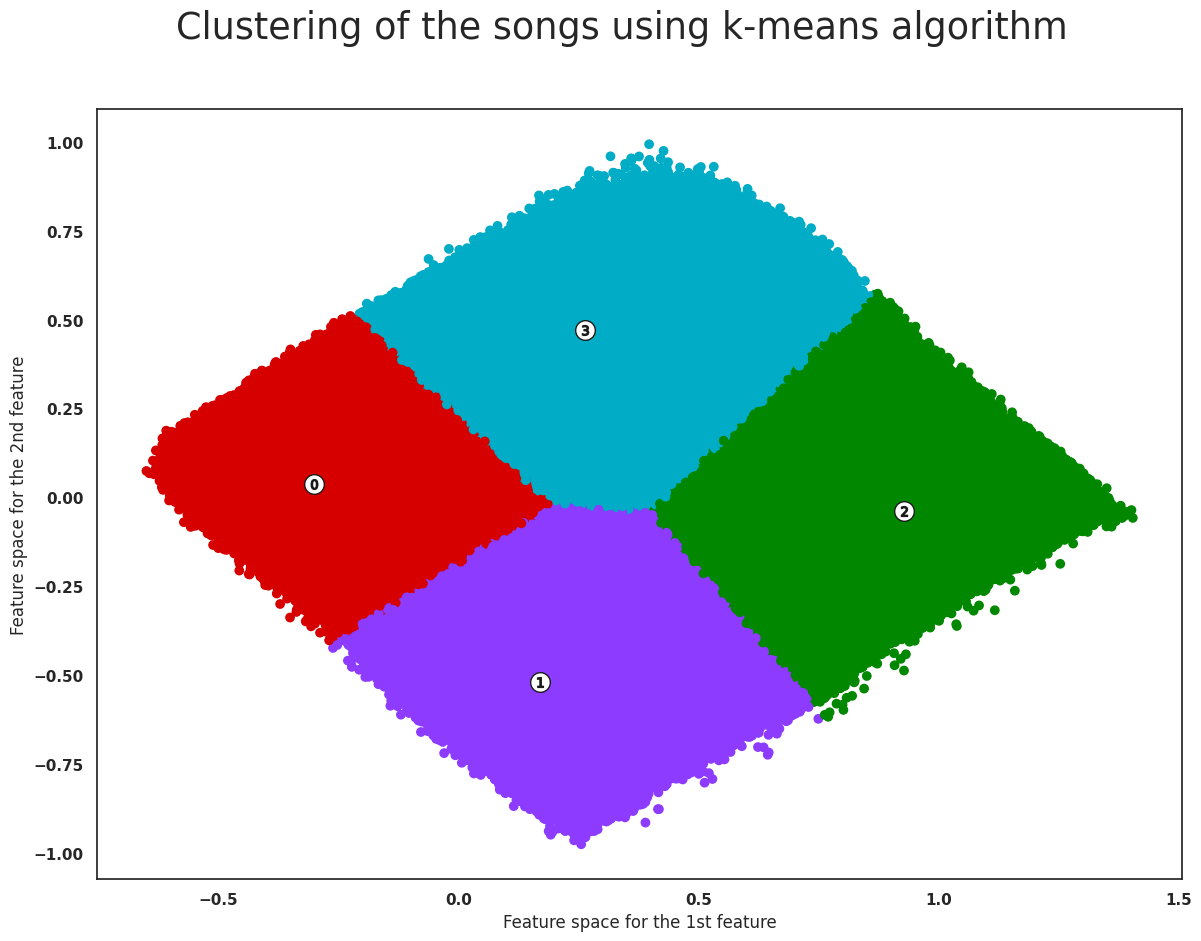

In [75]:
import colorcet as cc
from sklearn.cluster import KMeans

K = 4

kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(embedding[:])

fig, ax = plt.subplots()

font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette(cc.glasbey, n_colors=K)[x] for x in kmeans.labels_[:]]
)

centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")


fig.suptitle("Clustering of the songs using k-means algorithm")
ax.set_xlabel("Feature space for the 1st feature")
ax.set_ylabel("Feature space for the 2nd feature")

In [12]:
# load filtered listening events
filtered_df = pd.read_csv('/Users/str1ct0wn3r/Documents/RP/data/Filtered_Data/filtered_listening_events.csv')

filtered_df

,user_id,track_id,listening_count
0,68354,5696512,6
1,68354,9375482,6
2,68354,29424114,2
3,68354,32321441,6
4,68354,32495228,4
...,...,...,...
5455667,109991,20920521,3
5455668,109991,4443419,27
5455669,109991,11106170,17
5455670,109991,26141459,7


In [143]:
# statistics about the listening events

print(filtered_df['listening_count'].sum())

print(len(filtered_df['user_id'].unique()))

print(len(filtered_df['track_id'].unique()))

print(filtered_df.groupby('user_id', group_keys=True)['listening_count'].sum().min())

print(filtered_df.groupby('user_id', group_keys=True)['listening_count'].sum().quantile([0.25, 0.5, 0.75]))

print(filtered_df.groupby('user_id', group_keys=True)['listening_count'].sum().max())

print(filtered_df.groupby('user_id', group_keys=True)['listening_count'].sum().mean())

49423141
3350
1011435
10
0.25     1103.0
0.50     7160.0
0.75    18157.5
Name: listening_count, dtype: float64
339215
14753.176417910448


12335


Text(0.5, 1.0, 'Tracks listened by a given user inside the clustering(user tracks are in red)')

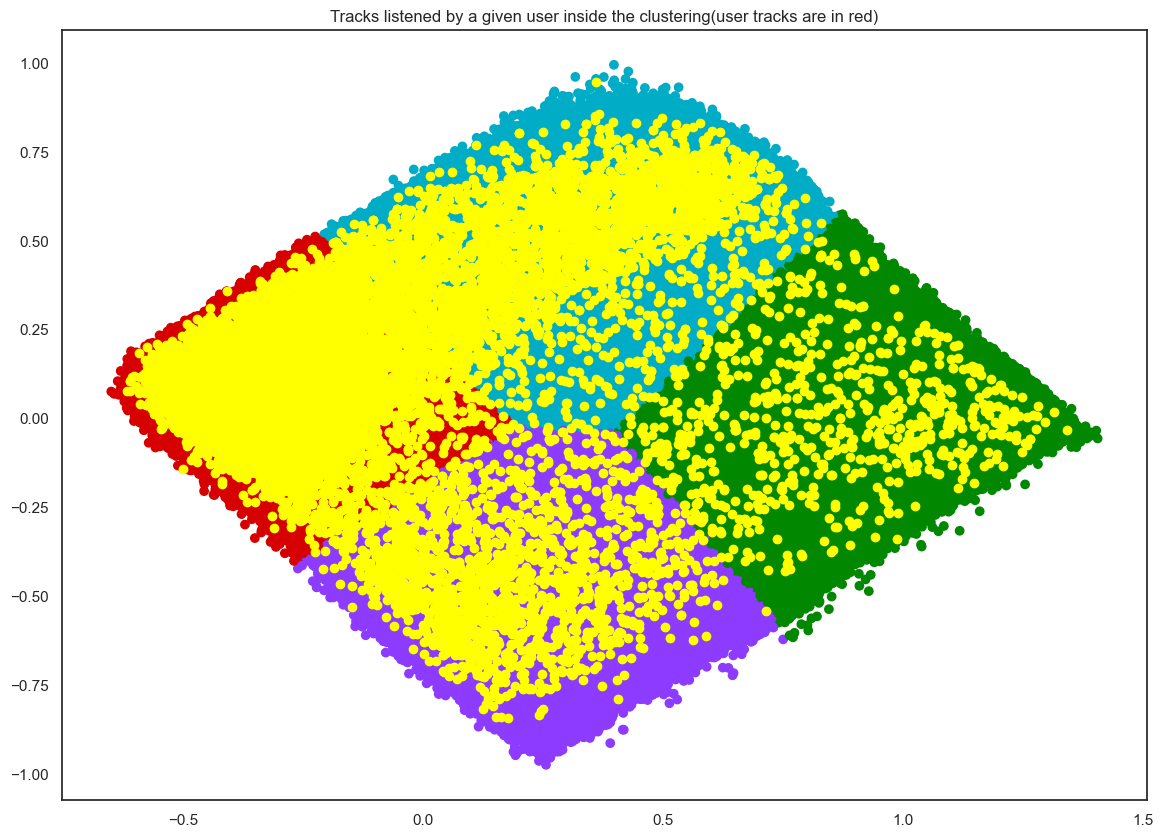

In [111]:
# display a user's listening events on top of the 2D graph

# songs listened by the first user
CUR_USER = 2126
only_current = set(filtered_df[(filtered_df['user_id'] == CUR_USER) & (filtered_df['listening_count'] > 0)]['track_id'])

# get indexes of those songs in embedding
indexes = spotify_df.index[spotify_df['track_ids'].apply(lambda x : bool(set(x) & only_current))]
print(len(indexes))

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette(cc.glasbey, n_colors=K)[x] for x in kmeans.labels_]
)
plt.scatter(embedding[indexes, 0],
            embedding[indexes, 1],
            c='yellow')
plt.title("Tracks listened by a given user inside the clustering(user tracks are in red)")


In [26]:
# find the cluster that contains the highest amount of listened songs
def find_cluster(user_id, ignore_track):
    # songs listened by the first user
    only_current = set(filtered_df[(filtered_df['user_id'] == user_id) & (filtered_df['track_id'] != ignore_track)]['track_id'])
    
    # get clusters of those songs in embedding
    clusters = kmeans.labels_[spotify_df.index[spotify_df['track_ids'].apply(lambda x : bool(set(x) & only_current))]]
    
    #print("Majority cluster", np.argmax(np.bincount(clusters)))
    #print(clusters)

    return np.argmax(np.bincount(clusters))


In [15]:
# calculate average statistics of a cluster
def calculate_profile(cluster_id):
    #indexes of songs
    cur_df = np.take(spotify_df, np.argwhere(kmeans.labels_==cluster_id).reshape(-1), axis=0)[["speechiness", "instrumentalness", "valence", "liveness", "energy", "tempo", "danceability", "acousticness"]]
     
    cur_df=cur_df.mean()
    return cur_df.to_dict()
#calculate_profile(3)

In [27]:
from scipy.spatial.distance import cosine

# perform the test for a user
def perform_test_for_user(user_id):

    # get the track_id of the song that has been listened the most
    value_cnts = filtered_df[filtered_df['user_id'] == user_id][['track_id', 'listening_count']].to_numpy()
    most_listened_track_id = value_cnts[np.argmax(value_cnts[:,1])]
    
    # find the cluster that represents the user the best
    user_cluster = find_cluster(user_id=user_id, ignore_track=most_listened_track_id[0])
    
    # calculate the profile for the user's cluster
    calculated_profile = calculate_profile(cluster_id=user_cluster)
    
    # get the feature data for the most listened track
    most_listened_track = spotify_df[spotify_df['track_ids'].apply(lambda x : most_listened_track_id[0] in set(x))][["speechiness", "instrumentalness", "valence", "liveness", "energy", "tempo", "danceability", "acousticness"]].to_dict(orient="records")[0]

    most_listened_track_to_list = np.array([list(most_listened_track.values())]).reshape(1, -1)
    calculated_profile_to_list = np.array([list(calculated_profile.values())]).reshape(1, -1)

    return 1-cosine(scaler.transform(most_listened_track_to_list)[0], scaler.transform(calculated_profile_to_list)[0])
    
#perform_test_for_user(2126)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

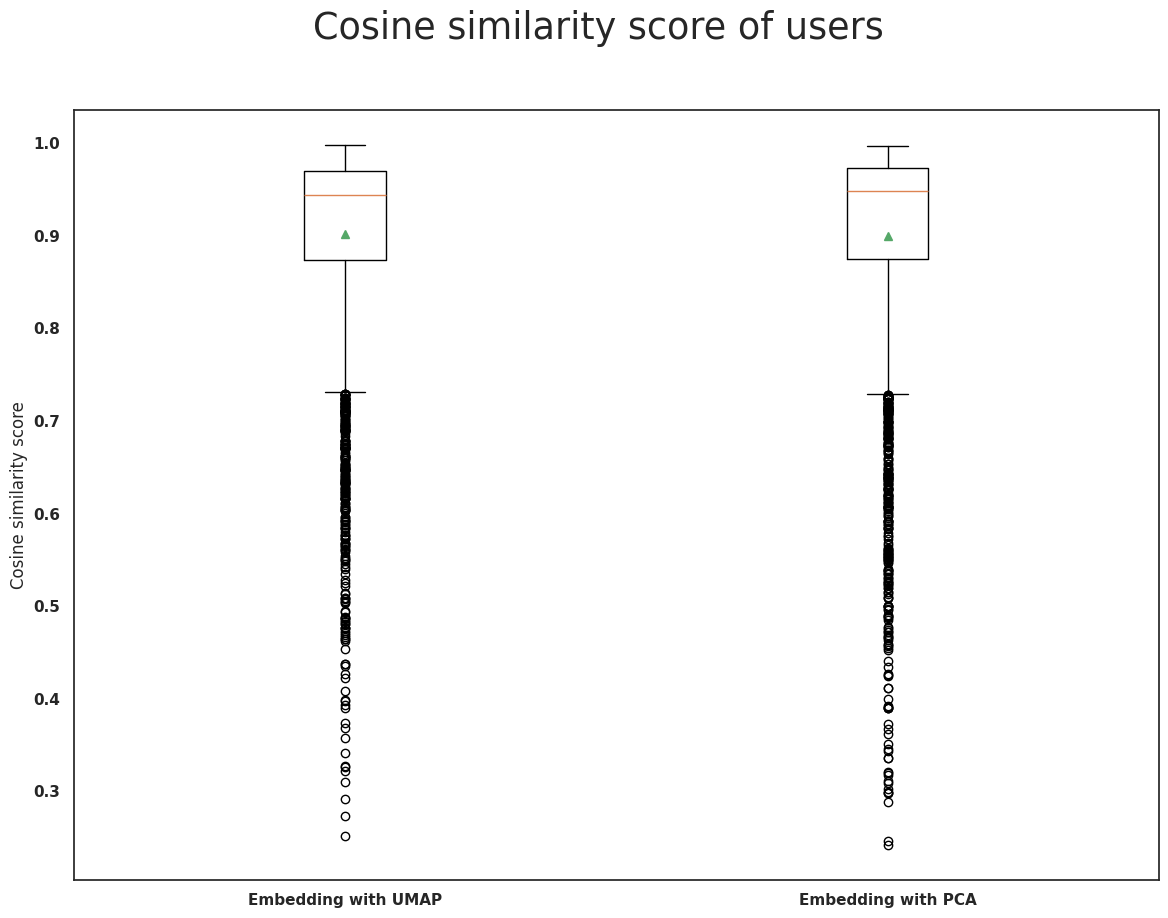

In [85]:
# perform test for every user

def calculate_mean(type):
    if type == 0:
        pd.DataFrame(data=np.array([perform_test_for_user(x) for x in filtered_df['user_id'].unique()[:]]), columns=['score']).to_csv("/Users/str1ct0wn3r/Documents/RP/data/calculations_data/cos_score_umap.csv", index=False)
    if type == 1:
        pd.DataFrame(data=np.array([perform_test_for_user(x) for x in filtered_df['user_id'].unique()[:]]), columns=['score']).to_csv("/Users/str1ct0wn3r/Documents/RP/data/calculations_data/cos_score_pca.csv", index=False)
    
    score_pca = pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/calculations_data/cos_score_pca.csv").to_numpy().reshape(1, -1)[0]
    score_umap = pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/calculations_data/cos_score_umap.csv").to_numpy().reshape(1, -1)[0]

    font = {'weight' : 'bold',
            'size'   : 22}

    plt.rc('font', **font)

    fig, ax = plt.subplots()

    my_dict = {"Embedding with UMAP":score_umap, "Embedding with PCA":score_pca}

    ax.boxplot(my_dict.values(),showmeans=True)
    ax.set_ylabel("Cosine similarity score")
    ax.set_xticklabels(my_dict.keys())
    fig.suptitle("Cosine similarity score of users")

calculate_mean(2)